# Limpieza de datos con python y pandas

# 1. El problema
Clasificar si una persona tiene obesidad según sus hábitos alimenticios y nivel de actividad física.

# 2. El set de datos
Los datos consisten en la estimación de los niveles de obesidad en personas de los países de México, Perú y Colombia, con edades entre 14 y 61 años, y con diversos hábitos alimenticios y condiciones físicas. Los datos fueron recolectados mediante una plataforma web con una encuesta en la que usuarios anónimos respondieron cada pregunta. Luego, la información fue procesada, obteniendo 17 atributos y 2111 registros.

Los atributos relacionados con los hábitos alimenticios son:

- Consumo frecuente de alimentos con alto contenido calórico (FAVC).
- Frecuencia de consumo de verduras (FCVC).
- Número de comidas principales (NCP).
- Consumo de alimentos entre comidas (CAEC).
- Consumo diario de agua (CH20).
- Consumo de alcohol (CALC).

Los atributos relacionados con la condición física son:
- Monitoreo del consumo de calorías (SCC).
- Frecuencia de actividad física (FAF).
- Tiempo de uso de dispositivos tecnológicos (TUE).
- Medio de transporte utilizado (MTRANS).

Variables obtenidas:
- Género.
- Edad.
- Estatura.
- Peso.

Los valores de NObesity son:
- Bajo peso: Menos de 18.5
- Normal: 18.5 a 24.9
- Sobrepeso: 25.0 a 29.9
- Obesidad I: 30.0 a 34.9
- Obesidad II: 35.0 a 39.9
- Obesidad III: Mayor a 40

# 3. Una primer mirada al dataset

In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lectura
ruta = '../1_data/ObesityDataSet.csv'
data = pd.read_csv(ruta)

In [4]:
print(data.shape)
data.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# 4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

De acuerdo a la información previa, no tenemos datos faltantes.

## 4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con la posible clasificación de obesidad.
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "Gender" solo tuviésemos el nivel "Male".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "Age" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "Age" tuviésemos la columna "date_born", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [7]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
            'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


# cols_cat = data.select_dtypes(include=['object']).columns


for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} subniveles')
    # print(f'Columna {col}:')



Columna Gender: 2 subniveles
Columna family_history_with_overweight: 2 subniveles
Columna FAVC: 2 subniveles
Columna CAEC: 4 subniveles
Columna SMOKE: 2 subniveles
Columna SCC: 2 subniveles
Columna CALC: 4 subniveles
Columna MTRANS: 5 subniveles
Columna NObeyesdad: 7 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [9]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

## 4.3 Filas repetidas

In [10]:
data.duplicated().value_counts()

False    2087
True       24
Name: count, dtype: int64

In [11]:
data[data.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [12]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (2111, 17)
Tamaño del set después de eliminar las filas repetidas: (2087, 17)


## 4.4 Outliers en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

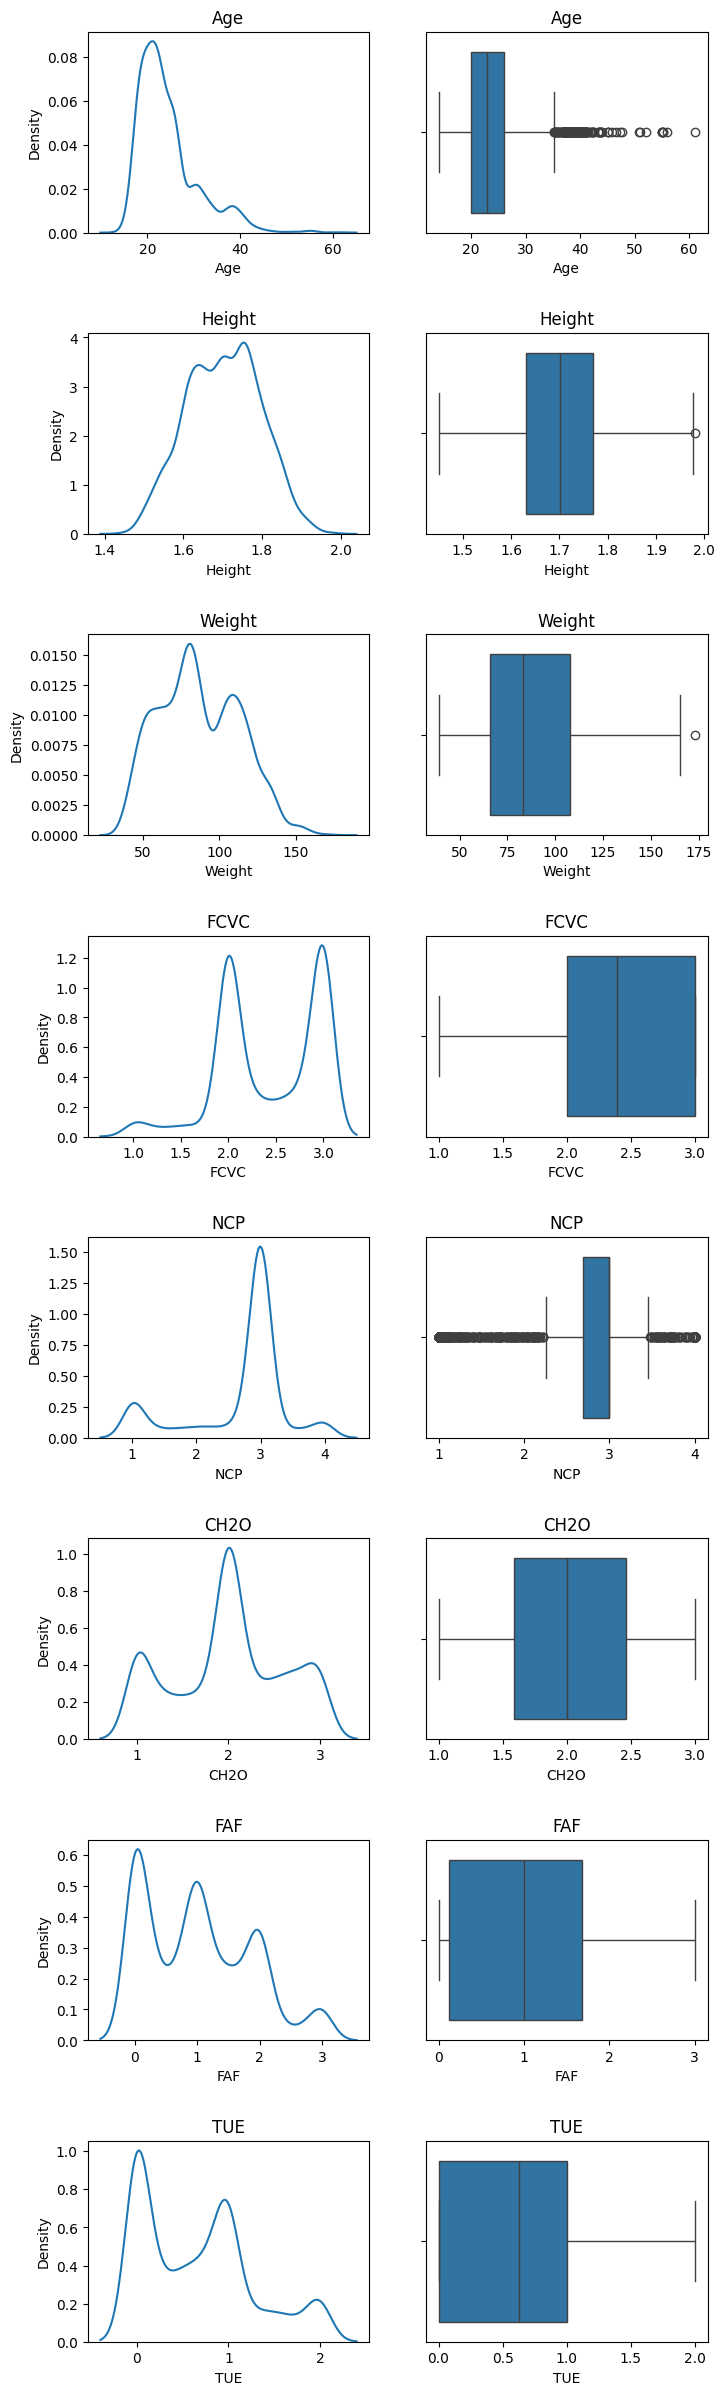

In [13]:
# Genera gráficas individuales de las variables numéricas debido
# a que están en rangos diferentes.
#cols_num = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 
#            'CH2O', 'FAF', 'TUE']

cols_num = data.select_dtypes(exclude=['object']).columns # Selecciona las columnas no object

fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i, 1])
    ax[i, 1].set_title(col)

    sns.kdeplot(x=col, data=data, ax=ax[i, 0])
    ax[i, 0].set_title(col)

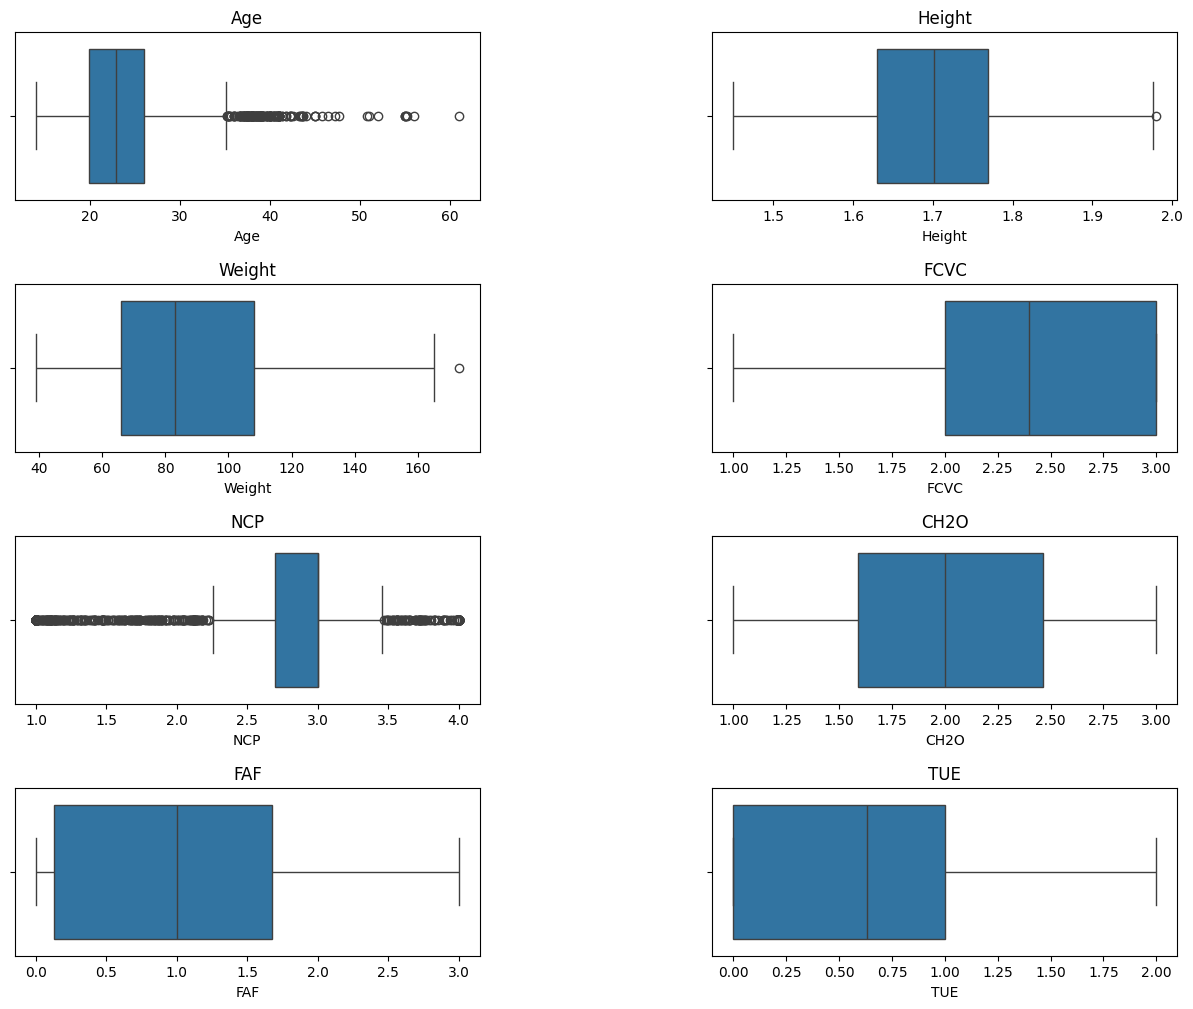

In [15]:
# Crear subgráficos en una cuadrícula 4x2
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))  
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajustar espacio entre gráficos

# Aplanar la matriz de ejes para un acceso más fácil
ax = ax.flatten()

# Graficar cada columna en un boxplot
for i, col in enumerate(cols_num):
    sns.boxplot(x=data[col], ax=ax[i])
    ax[i].set_title(col)

plt.show()

Observaciones:
- No se ven datos que puedan ser eliminados de las columnas numéricas.

## 4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

C:\Users\Edwin Reyes\AppData\Local\Temp\ipykernel_14272\3361737788.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Edwin Reyes\AppData\Local\Temp\ipykernel_14272\3361737788.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Edwin Reyes\AppData\Local\Temp\ipykernel_14272\3361737788.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Edwin Reyes\AppData\Local\Temp\ipykernel_14272\3361737788.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i

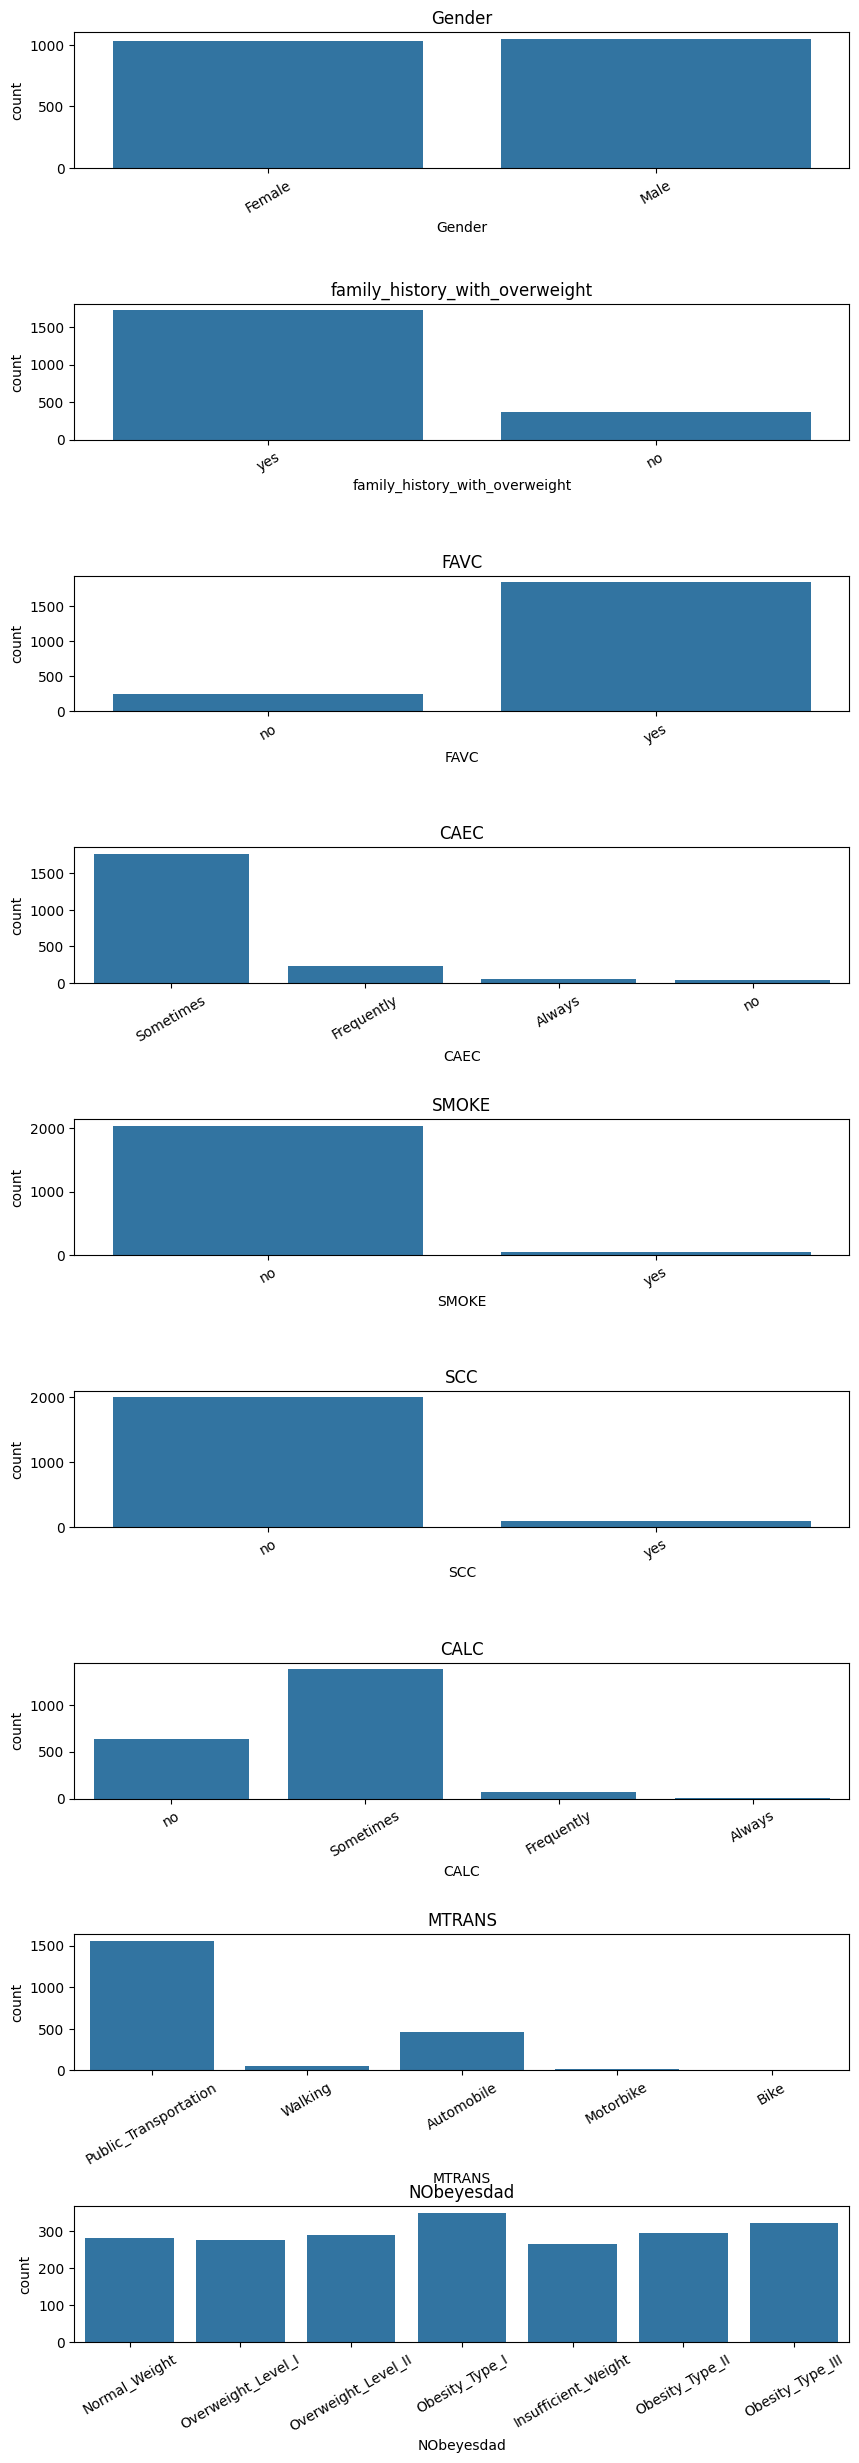

In [46]:
# Graficar los niveles de cada variable categórica
cols_cat = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
            'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [47]:
data.shape

(2087, 17)

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenía 2.111 registros y 17 columnas. El dataset resultante tiene 2.087 filas (24 menos) y 17 columnas.

El set de datos ya está listo para el Análisis Exploratorio.

In [50]:
ruta = '../1_data/dataset_obesity_clean.csv'
data.to_csv(ruta)